In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras

In [0]:
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]
# Para deep
#iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

In [0]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
#sns.pairplot(iris_X[:,1:6],hue="Species")

In [0]:
# iris_X[:,1:6]

In [5]:
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils


Using TensorFlow backend.


In [6]:
trainY

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [7]:
np.array(trainY)

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

# Prepare data
iris = sns.load_dataset("iris")
X = iris.values[:, 0:4]
y = iris.values[:, 4]

# Make test and train set
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(trainX, trainY)
pred_y = lr.predict(testX)
print("Test fraction correct (LR-Accuracy) = {:.2f}".format(lr.score(testX, testY)))

Test fraction correct (LR-Accuracy) = 0.98


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testY, pred_y)
print(confusion_matrix)

[[19  0  0]
 [ 1 14  0]
 [ 0  0 16]]


## Deep

In [0]:
# Si ahcemos esto: loss='categorical_crossentropy'
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values

In [0]:
#from sklearn.preprocessing import LabelEncoder
#encoder =  LabelEncoder()
#y1 = encoder.fit_transform(trainY)

#Y = pd.get_dummies(y1).values

In [0]:
# trainX

In [0]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [0]:
batch_size = 16

from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         batch_size=batch_size,
                         write_images=True)

In [0]:
#!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
#!unzip ngrok-stable-linux-amd64.zip

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [37]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.6/json/__init__.py", line 299, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.6/json/__init__.py", line 354, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.6/json/decoder.py", line 339, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.6/json/decoder.py", line 357, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [16]:
model.fit(trainX, trainY, verbose=1, batch_size=1)
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Epoch 1/1
99/99 [==============================] - 2s 16ms/step - loss: 1.1079 - acc: 0.3535
Test fraction correct (NN-Score) = 1.08
Test fraction correct (NN-Accuracy) = 0.34


### Comparación frente a un clasificador aleatorio

In [19]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='uniform', random_state=1)
dummy_classifier.fit(trainX, trainY )

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [20]:
dummy_classifier.score(testX, testY)

0.1

In [21]:
from sklearn.metrics import accuracy_score
y_predicted = dummy_classifier.predict(testX)

#print (testY)
#print (y_predicted)
# Find model accuracy
print ("Model accuracy = %0.2f"%(accuracy_score(testY,y_predicted) * 100) + "%\n")

Model accuracy = 10.00%



### Optimización del modelo

In [0]:
from keras.layers import Dense, Dropout
from keras.regularizers import l2

model = Sequential()
model.add(Dense(16,
                input_shape=(4,), 
                activation="tanh",
                kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))



model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
python-pydot is already the newest version (1.0.28-2).
python-pydot-ng is already the newest version (1.0.0-3).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [0]:
!apt install python-pydot python-pydot-ng graphviz
!pip install -q pydot
!pip install graphviz
#Then reboot instance

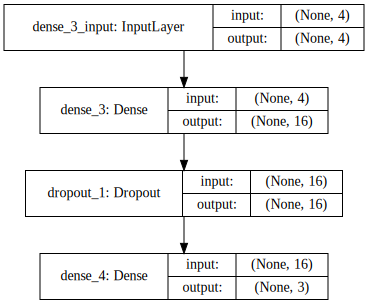

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

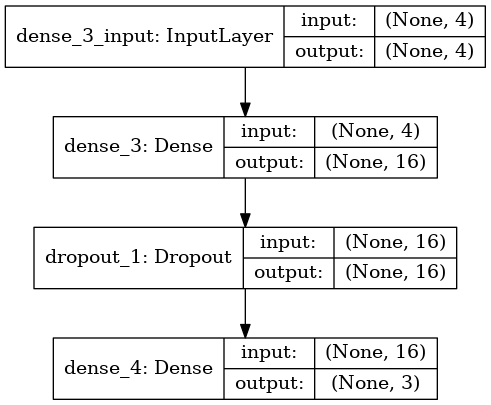

In [31]:
plot_model(model, show_shapes=True, to_file='network.png')
from IPython.display import Image
Image('network.png', width=400, height=400)

In [0]:
history = model.fit(trainX, trainY, verbose=0, batch_size=1, epochs=100, validation_data=(testX, testY),
          callbacks=[tbCallBack])

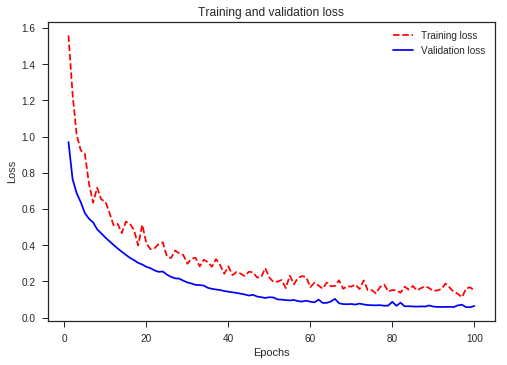

In [50]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

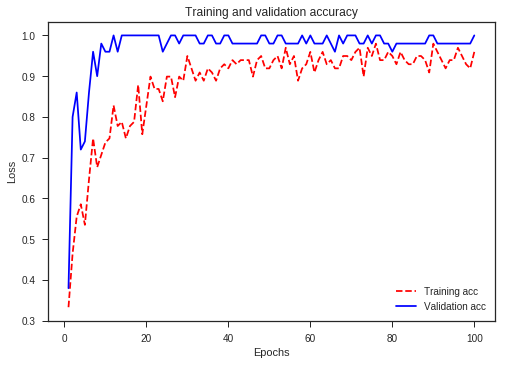

In [51]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'r--', label='Training acc')
plt.plot(epochs, val_acc, 'b-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
score, accuracy = model.evaluate(testX, testY, batch_size=16, verbose=0)
#print("Test fraction correct (LR-Accuracy) = {:.2f}".format(lr.score(testX, testY)))
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test fraction correct (NN-Score) = 0.06
Test fraction correct (NN-Accuracy) = 1.00


In [0]:
pred_y = model.predict(testX)
#pred_y

In [0]:
#testY

In [29]:
y_test_class = np.argmax(testY,axis=1)
y_pred_class = np.argmax(pred_y,axis=1)

print(y_test_class)
print(y_pred_class)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [34]:
confusion_matrix = confusion_matrix(y_test_class, y_pred_class)
print(confusion_matrix)

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [0]:
# Random classifier

import copy

y_pred_class_copy = copy.copy(y_pred_class)
np.random.shuffle(y_pred_class_copy)
float(np.sum(np.array(y_pred_class) == np.array(y_pred_class_copy))) / len(y_pred_class)

# Tf

In [0]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]

# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]


# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [0]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

In [0]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

In [0]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

In [0]:
# Number of Epochs in our training
numEpochs = 700

# Defining our learning rate iterations (decay)
learningRate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [0]:
#Defining our cost function - Squared Mean Error
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")

#Defining our Gradient Descent
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [0]:
# Create a tensorflow session
sess = tf.Session()

# Initialize our weights and biases variables.
init_OP = tf.global_variables_initializer()

# Initialize all tensorflow variables
sess.run(init_OP)

In [0]:
# argmax(activation_OP, 1) returns the label with the most probability
# argmax(yGold, 1) is the correct label
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))

# If every false prediction is 0 and every true prediction is 1, the average returns us the accuracy
accuracy_OP = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op for regression output
activation_summary_OP = tf.summary.histogram("output", activation_OP)

# Summary op for accuracy
accuracy_summary_OP = tf.summary.scalar("accuracy", accuracy_OP)

# Summary op for cost
cost_summary_OP = tf.summary.scalar("cost", cost_OP)

# Summary ops to check how variables (W, b) are updating after each iteration
weightSummary = tf.summary.histogram("weights", weights.eval(session=sess))
biasSummary = tf.summary.histogram("biases", bias.eval(session=sess))

# Merge all summaries
merged = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])

# Summary writer
writer = tf.summary.FileWriter(LOG_DIR + "summary_logs", sess.graph)

In [43]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy_OP, cost_OP], feed_dict={X: trainX, yGold: trainY})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            # Add cost to live graphing variable
            cost_values.append(newCost)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.333333, cost 33.9612, change in cost 33.9612
step 10, training accuracy 0.555556, cost 30.1788, change in cost 3.78246
step 20, training accuracy 0.646465, cost 28.2344, change in cost 1.94443
step 30, training accuracy 0.646465, cost 26.5885, change in cost 1.64588
step 40, training accuracy 0.646465, cost 25.2182, change in cost 1.37033
step 50, training accuracy 0.646465, cost 24.0844, change in cost 1.13373
step 60, training accuracy 0.646465, cost 23.1451, change in cost 0.939333
step 70, training accuracy 0.646465, cost 22.3621, change in cost 0.783026
step 80, training accuracy 0.646465, cost 21.7037, change in cost 0.658354
step 90, training accuracy 0.646465, cost 21.1448, change in cost 0.558922
step 100, training accuracy 0.656566, cost 20.6655, change in cost 0.479267
step 110, training accuracy 0.666667, cost 20.2505, change in cost 0.415014
step 120, training accuracy 0.666667, cost 19.8877, change in cost 0.36277
step 130, training accuracy 0.

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


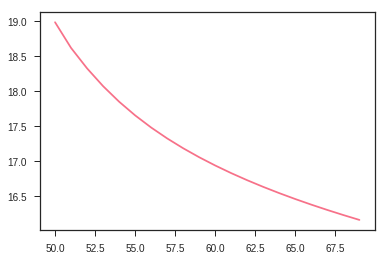

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()

In [48]:
!ps aux | grep tensorboard

root       107  0.5  2.1 1771156 283032 ?      Sl   16:03   0:11 /usr/bin/python2 /usr/local/bin/tensorboard --logdir ./log --host 0.0.0.0 --port 6006
root       460  100  0.0  33964  4820 pts/0    Ss+  16:39   0:01 /bin/sh -c ps aux | grep tensorboard
root       462  0.0  0.0  38200  5588 pts/0    S+   16:39   0:00 grep tensorboard


In [49]:
!ps aux | grep ngrok

root       341  0.4  0.3  51220 43556 ?        Sl   16:29   0:02 ./ngrok http 6006
root       463  100  0.0  33964  4796 pts/0    Ss+  16:39   0:01 /bin/sh -c ps aux | grep ngrok
root       465  0.0  0.0  38200  4952 pts/0    S+   16:39   0:00 grep ngrok


In [0]:
!kill 107

In [0]:
!rm -rf log

In [46]:
!ls log

events.out.tfevents.1530648033.27470c3c338c
events.out.tfevents.1530650649.27470c3c338c
